# Import SASPy and pandas

In [1]:
import saspy
import pandas as pd
from IPython.display import HTML


# check the version of SASPy
A popular python keyword `__version__` it. 
See the reference of [PEP 396](https://www.python.org/dev/peps/pep-0396/)

In [2]:
saspy.__version__

'2.2.4'

# Create a SAS session object named `sas1`


In [3]:
sas1 = saspy.SASsession()

Using SAS Config named: default
SAS Connection established. Subprocess id is 1123



## You can get numerous elements of information about your SAS session object by submitting `sas1` 

In [4]:
sas1

Access Method         = STDIO
SAS Config name       = default
WORK Path             = /tmp/SAS_workFBA200000463_25838e4e1ac4/
SAS Version           = V.03.03M0P11082017
SASPy Version         = 2.2.4
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = UTF-8
Python Encoding value = utf-8

## Create a SAS Data Object named `iris` that points to sashelp.iris

In [5]:
iris = sas1.sasdata('iris','sashelp')

### If you didn't know how to create the `sasdata` oject you can use hte python convention of `?` in front of the function and see the docstring

In [6]:
?sas1.sasdata

Signature: sas1.sasdata(table:str, libref:str='', results:str='', dsopts:dict={}) -> 'SASdata'
Docstring:
Method to define an existing SAS dataset so that it can be accessed via SASPy

:param table:   the name of the SAS Data Set
:param libref:  the libref for the Data Set, defaults to WORK, or USER if assigned
:param results: format of results, SASsession.results is default, Pandas, HTML and TEXT are the valid options
:param dsopts: a dictionary containing any of the following SAS data set options(where, drop, keep, obs, firstobs):

    - where is a string
    - keep are strings or list of strings.
    - drop are strings or list of strings.
    - obs is a numbers - either string or int
    - first obs is a numbers - either string or int

    .. code-block:: python

                     {'where'    : 'msrp < 20000 and make = "Ford"'
                      'keep'     : 'msrp enginesize Cylinders Horsepower Weight'
                      'drop'     : ['msrp', 'enginesize', 'Cylinders', 'Ho

### To see the source code use a `??` instead of a single `?` 

In [7]:
??sas1.sasdata

Signature: sas1.sasdata(table:str, libref:str='', results:str='', dsopts:dict={}) -> 'SASdata'
Source:   
    def sasdata(self, table: str, libref: str = '', results: str = '', dsopts: dict = {}) -> 'SASdata':
        """
        Method to define an existing SAS dataset so that it can be accessed via SASPy

        :param table:   the name of the SAS Data Set
        :param libref:  the libref for the Data Set, defaults to WORK, or USER if assigned
        :param results: format of results, SASsession.results is default, Pandas, HTML and TEXT are the valid options
        :param dsopts: a dictionary containing any of the following SAS data set options(where, drop, keep, obs, firstobs):

            - where is a string
            - keep are strings or list of strings.
            - drop are strings or list of strings.
            - obs is a numbers - either string or int
            - first obs is a numbers - either string or int

            .. code-block:: python

                   

## Now that we have created the `iris` SAS data object use the methods to explore the data

# Using the `head` method you can see the first 5 observations

In [8]:
iris.head()

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Setosa,50,33,14,2
1,Setosa,46,34,14,3
2,Setosa,46,36,10,2
3,Setosa,51,33,17,5
4,Setosa,55,35,13,2


# Using the `bar` method you can see a graph of the distribution of the different iris species
We see that the data set is balanced with 3 types of iris each have 50 observations for a total of 150 data points


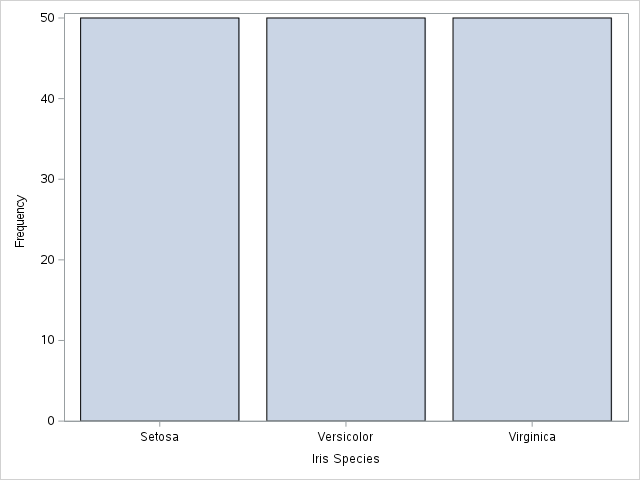

In [9]:
iris.bar('species')

# You can get numerical summary of the `iris` data by using the `means` method
You will notice that the variable `species` in not included in the `means` method that is because it is restricted to variables with a numeric type 

In [10]:
iris.means()

,Variable,Label,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,SepalLength,Sepal Length (mm),150,0,58.0,58.433333,8.280661,43,51,58.0,64,79
1,SepalWidth,Sepal Width (mm),150,0,30.0,30.573333,4.358663,20,28,30.0,33,44
2,PetalLength,Petal Length (mm),150,0,43.5,37.580000,17.652982,10,16,43.5,51,69
3,PetalWidth,Petal Width (mm),150,0,13.0,11.993333,7.622377,1,3,13.0,18,25


## To look at all the variables in the dataset along with their type and other relevant infomation use the `info` method.
We can see this dataset includes 5 varibles with 150 observations. There are no missing values so we will not need to imput an data, if we did the `imput` method is there to help us

In [11]:
iris.info()

,Variable,type,N,Nmiss
0,Species,char,150,0
1,SepalLength,numeric,150,0
2,SepalWidth,numeric,150,0
3,PetalLength,numeric,150,0
4,PetalWidth,numeric,150,0


## In the creation of `SASPy`, one key feature was to make tabular results easy to work with for python programmers. To this end, the tabular results are returned, by default as [pandas dataframes](https://pandas.pydata.org)
To verify this, use the `type` function to check the results of `iris.info()` (or any other tabular output you've created in this notebook

In [12]:
type(iris.info())

pandas.core.frame.DataFrame

### Because the result is a pandas dataframe you can manipulate the results using any of the methods for pandas present the results
Let's get the variables in the dataset and put them into a python list

In [13]:
vlist = iris.info().Variable.tolist()
vlist

['Species', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

### Now we can use the list of variables in a loop to create histograms for each numeric variable


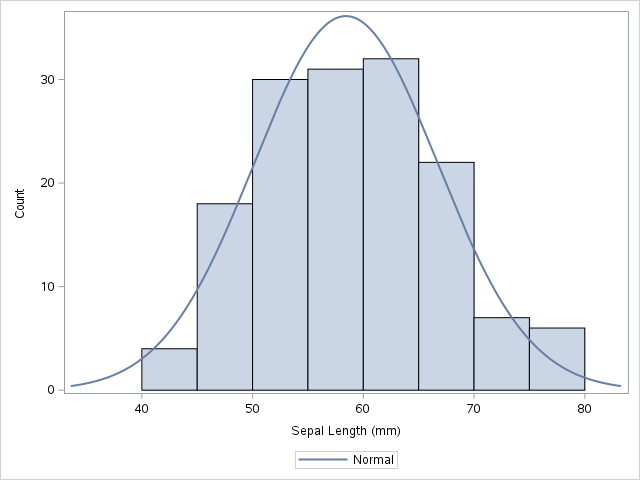


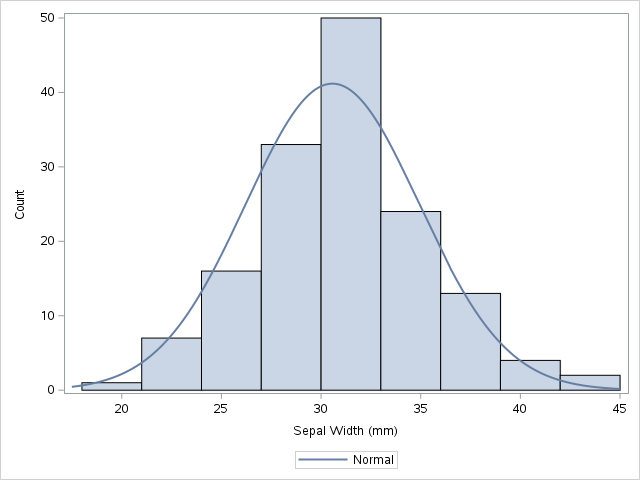


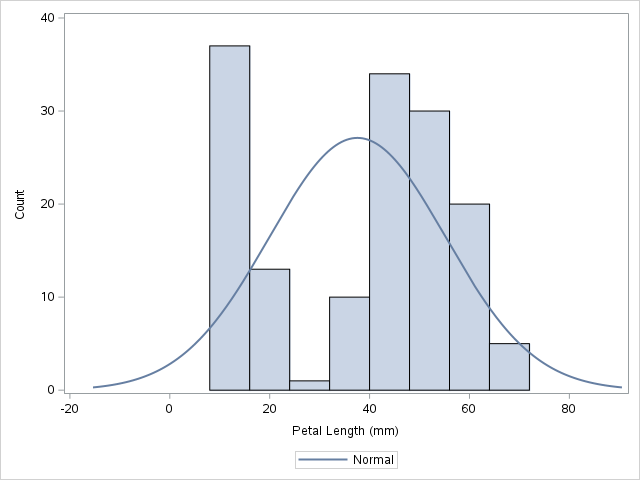


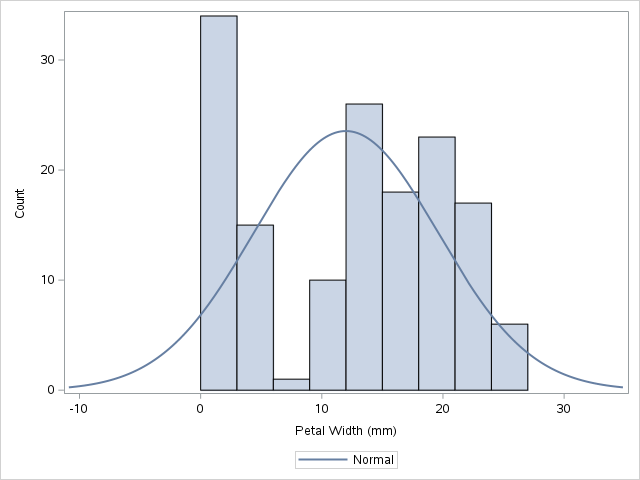

In [14]:
for i in vlist[1:]:
    iris.hist(i)

### The graphics being rendered here are HTML5 objects created in the SAS session. We can use other graphing methods like the `heatmap` method to create useful plots in just a few key strokes.


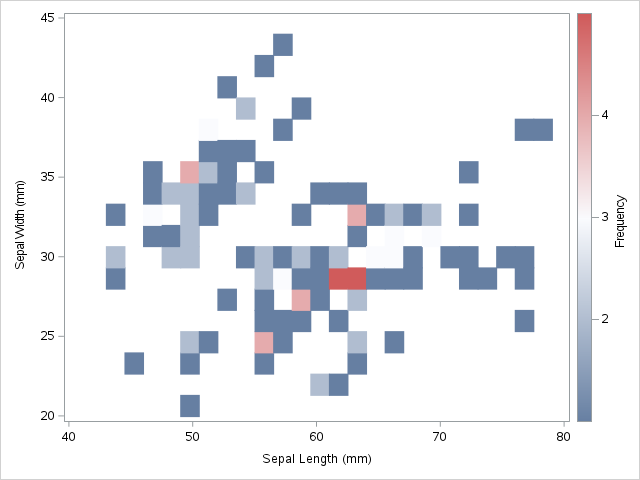

In [15]:
iris.heatmap('sepallength','sepalwidth')

## If you are an experienced SAS programmer then the plot above might look very familiar but regardless you might want to know the needed SAS code to create it. There is a saspy method for that named `teach_me_sas`
When this method is `True` instead of the code being executed by the SAS server, it is printed for the user.

In [16]:
sas1.teach_me_SAS(True)
iris.heatmap('sepallength','sepalwidth')
sas1.teach_me_SAS(False)



proc sgplot data=sashelp.iris ;
	heatmap x=sepallength y=sepalwidth;;
run;
title;


# The next step in analyzing the data is to partition the data into training and validation and build predictive models.
The first models to build will be a decision tree and regression model

The partitioning can easily be done using the `partition` method if you have the `HPSAMPLE` procedure licensed
```
iris_part = iris.partition(fraction=.7, var='species')
```

In [21]:
iris_part = iris.partition(fraction=.7, var='species')

If you didn't have `HPSAMPLE` licensed here is pandas code to accomplish the same thing

## Before I can build preditive models I must create a model object. In SASPy the model objects are organized by the SAS products STAT, ETS, OR, UTIL (for base), and ML (for data mining)
This line
```
stat = sas1.sasstat()
```
Creates a sas stat object where the methods are the SAS procedures in that product. To see the methods use TAB complete or `dir(stat)` 

In this cell we will also define a python variable for the target. This will make the code more portable

In [23]:
stat = sas1.sasstat()
target = 'species'

In [42]:
tree_res = stat.hpsplit(data=iris_part, target=target, input=vlist[1:], score='hpsplit.sas', partition="rolevar=_partind_(TRAIN='1' VALIDATE='0');")

In [58]:
tree_res.VARIMPORTANCE

,Variable,VariableLabel,RelativeImportance,SSEImportance,ValidRelImport,ValidSSEImport,ImportanceRatio,Count
0,PetalLength,Petal Length (mm),1.000000,5.916080,1.000000,3.872983,1.000000,1
1,PetalWidth,Petal Width (mm),0.891556,5.274515,0.845636,3.275133,0.948494,1


In [44]:
tree_res.CONFUSIONMATRIX

,Partition,ActualValue,Predicted1,Predicted2,Predicted3,LevelMisclassRate
0,Training,VIRGINICA,31,4,0,0.114286
1,Training,VERSICOLOR,0,35,0,0.000000
2,Training,SETOSA,0,0,35,0.000000
3,Validation,VIRGINICA,15,0,0,0.000000
4,Validation,VERSICOLOR,2,13,0,0.133333
5,Validation,SETOSA,0,0,15,0.000000
